Centroid :  0  Original :  [-0.11750294  0.61040216]  Current :  [0.31107254 0.38356013]
Centroid :  1  Original :  [2.55521356 1.183814  ]  Current :  [5.8642783  2.67653229]
Centroid :  2  Original :  [0.57693484 1.92439994]  Current :  [0.89984507 2.24383879]
Centroid :  0  Original :  [0.31107254 0.38356013]  Current :  [0.95677664 0.32024778]
Centroid :  1  Original :  [5.8642783  2.67653229]  Current :  [6.50112708 3.0063122 ]
Centroid :  2  Original :  [0.89984507 2.24383879]  Current :  [1.31771527 2.04209825]
Centroid :  0  Original :  [0.95677664 0.32024778]  Current :  [1.0044002  0.34044387]
Centroid :  1  Original :  [6.50112708 3.0063122 ]  Current :  [6.56550946 2.97965145]
Centroid :  2  Original :  [1.31771527 2.04209825]  Current :  [1.44067048 2.26098582]
Centroid :  0  Original :  [1.0044002  0.34044387]  Current :  [1.01642157 0.41878048]
Centroid :  1  Original :  [6.56550946 2.97965145]  Current :  [6.61211162 2.95219571]
Centroid :  2  Original :  [1.44067048 2.

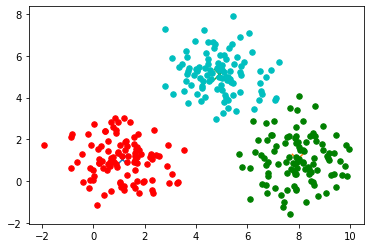

In [4]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import math

class K_Means:
    
    def __init__(self, k=2, tolerance = 0.001, max_iter = 500):
        self.k = k
        self.max_iterations = max_iter
        self.tolerance = tolerance
    
    def euclidean_distance(self, point1, point2):
        #return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2 + (point1[2]-point2[2])**2)   #sqrt((x1-x2)^2 + (y1-y2)^2)
        return np.linalg.norm(point1-point2, axis=0)
        
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
    def fit(self, data):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        
        for i in range(self.max_iterations):
            self.classes = {}
            for j in range(self.k):
                self.classes[j] = []
                
            for point in data:
                distances = []
                for index in self.centroids:
                    distances.append(self.euclidean_distance(point,self.centroids[index]))
                cluster_index = distances.index(min(distances))
                self.classes[cluster_index].append(point)
            
            previous = dict(self.centroids)
            for cluster_index in self.classes:
                self.centroids[cluster_index] = np.average(self.classes[cluster_index], axis = 0)
            

                
            isOptimal = True
            
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                print("Centroid : ",centroid," Original : ",original_centroid," Current : ",curr)
                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False
            if isOptimal:
                break


                
def main():
    K=3
    center_1 = np.array([1,1])
    center_2 = np.array([5,5])
    center_3 = np.array([8,1])

    # Generate random data and center it to the three centers
    cluster_1 = np.random.randn(100, 2) + center_1
    cluster_2 = np.random.randn(100,2) + center_2
    cluster_3 = np.random.randn(100,2) + center_3

    data = np.concatenate((cluster_1, cluster_2, cluster_3), axis = 0)
    
    k_means = K_Means(K)
    k_means.fit(data)
    
    
    # Plotting starts here
    colors = 10*["r", "g", "c", "b", "k"]

    for centroid in k_means.centroids:
        plt.scatter(k_means.centroids[centroid][0], k_means.centroids[centroid][1], s = 130, marker = "x")

    for cluster_index in k_means.classes:
        color = colors[cluster_index]
        for features in k_means.classes[cluster_index]:
            plt.scatter(features[0], features[1], color = color,s = 30)
    
if __name__ == "__main__":
    main()
            